<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Introduction

The purpose of this assignment is to use the X variables e.g. columns other than the newly created 'Top 10' column, to predict if the driver belongs in the top 10 positions.

A dataset's most common variables are either numerical or categorical. Categorical variables accept values from a group of categories, often known as labels, whereas numerical variables take integers as values which can either be discrete or continuous.

Machine learning algorithms are unsuitable to be trained on variables in their original, raw format. Hence, in order to develop powerful machine learning models, we must examine numerous features of a variable. These includes many aspects such as variable type, missing data, cardinality and category frequency, variable distribution and its relevance to the target, outliers, as well as feature magnitude are some of these considerations to take in place when performing data analysis on a raw dataset.

Therefore, it is important to understand, identify, and quantify all these aspects of a variable to be able to choose the appropriate methods to identify and remove outliers, handle missing data, perform categorical data encoding; discretize/binning of the numerical data and finally use appropriate feature engineering techniques.

In [1]:
# import the packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

from sklearn.model_selection import train_test_split

### Step 1: Problem Formulation

In [2]:
# loading of all csv files 
results_mod_data = pd.read_csv("./f1db_csv_mod/results_mod.csv")
circuits_mod = pd.read_csv("./f1db_csv_mod/circuits_mod.csv")
constructor_results_mod = pd.read_csv("./f1db_csv_mod/constructor_results_mod.csv")
constructor_standings_mod = pd.read_csv("./f1db_csv_mod/constructor_standings_mod.csv")
constructors_mod = pd.read_csv("./f1db_csv_mod/constructors_mod.csv")
driver_standings_mod = pd.read_csv("./f1db_csv_mod/driver_standings_mod.csv")
drivers_mod = pd.read_csv("./f1db_csv_mod/drivers_mod.csv")
lap_times_mod = pd.read_csv("./f1db_csv_mod/lap_times_mod.csv")
pit_stops_mod = pd.read_csv("./f1db_csv_mod/pit_stops_mod.csv")
qualifying_mod = pd.read_csv("./f1db_csv_mod/qualifying_mod.csv")
races_mod = pd.read_csv("./f1db_csv_mod/races_mod.csv")
seasons_mod = pd.read_csv("./f1db_csv_mod/seasons_mod.csv")
status_mod = pd.read_csv("./f1db_csv_mod/status_mod.csv")

In [3]:
#  first 10 rows of results table
results_mod_data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,01:29.6,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,01:29.5,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,01:27.9,217.18,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,01:28.8,215.1,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,01:29.6,213.166,3


### Step 2: Data Wrangling on multiple tables 

In [4]:
# merge results table with drivers table by inner join
results_mod_data = pd.merge(results_mod_data, drivers_mod, on='driverId', how='inner').drop_duplicates()

In [5]:
# replace '\\N' with NaNs
results_mod_data.replace('\\N', np.nan, inplace =True)

circuits_mod.replace('\\N', np.nan, inplace =True)
constructor_results_mod.replace('\\N', np.nan, inplace =True)
constructor_standings_mod.replace('\\N', np.nan, inplace =True)
constructors_mod.replace('\\N', np.nan, inplace =True)
driver_standings_mod.replace('\\N', np.nan, inplace =True)
drivers_mod.replace('\\N', np.nan, inplace =True)
lap_times_mod.replace('\\N', np.nan, inplace =True)
pit_stops_mod.replace('\\N', np.nan, inplace =True)
qualifying_mod.replace('\\N', np.nan, inplace =True)
races_mod.replace('\\N', np.nan, inplace =True)
seasons_mod.replace('\\N', np.nan, inplace =True)
status_mod.replace('\\N', np.nan, inplace =True)

In [6]:
# take a look at how many NaNs there are in each column
results_mod_data.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number_x               6
grid                   0
position           10786
positionText           0
positionOrder          0
points                 0
laps                   0
time               18590
milliseconds       18591
fastestLap         18446
rank               18249
fastestLapTime     18446
fastestLapSpeed    18446
statusId               0
driverRef              0
number_y           20257
code               16581
forename               0
surname                0
dob                    0
nationality            0
url                    0
dtype: int64

In [7]:
# drop columns as there are too many null values
results_mod_data = results_mod_data.drop(['number_x', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 
                                          'fastestLapTime', 'fastestLapSpeed', 'number_y', 'code'], axis = 1)

In [8]:
# check if columns are successfully removed
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,driverRef,forename,surname,dob,nationality,url
0,1,18,1,1,1,1,1,10.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,9,5,5,4.0,56,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,3,13,13,0.0,56,11,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,5,3,3,6.0,66,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,3,2,2,8.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25302,1069,853,210,17,17,17,0.0,54,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
25395,25323,1070,853,210,15,18,18,0.0,68,13,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
25396,25342,1071,853,210,19,17,17,0.0,69,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
25397,25363,1051,853,210,20,18,18,0.0,55,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [9]:
races_mod.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [10]:
# replace first part of url with empty string ''
races_mod['url'] = races_mod['url'].str.replace('http://en.wikipedia.org/wiki/', '')
races_mod['url'] = races_mod['url'].str.replace('https://en.wikipedia.org/wiki/', '')

C:\Users\DARRYL~1\AppData\Local\Temp/ipykernel_9240/2133429329.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod['url'] = races_mod['url'].str.replace('http://en.wikipedia.org/wiki/', '')
C:\Users\DARRYL~1\AppData\Local\Temp/ipykernel_9240/2133429329.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod['url'] = races_mod['url'].str.replace('https://en.wikipedia.org/wiki/', '')


In [11]:
# getting the year from url
races_mod_split = races_mod['url'].str.split('_', expand = True)
races_mod['url'] = races_mod_split[0]
races_mod = races_mod.rename(columns = {'url' : 'raceYear'})
races_mod.head()

,raceId,round,circuitId,name,date,time,raceYear
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,2009
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,2009
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,2009
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,2009
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,2009


In [12]:
# rename url
# races_mod = races_mod.rename(columns = {'url' : 'raceYear'})
# races_mod['raceYear'] = races_mod['raceYear'].astype(int)

In [13]:
# check if years are in correct format
races_mod['raceYear'].unique()

array(['2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990', '2010', '1989', '1988', '1987',
       '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1950', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '70th',
       '2021', '2022', 'São'], dtype=object)

In [14]:
# get index of those with wrong year format
print(races_mod[races_mod['raceYear']=='70th'].index)
print(races_mod[races_mod['raceYear']=='São'].index)

Int64Index([1022], dtype='int64')
Int64Index([1055], dtype='int64')


In [15]:
# use date column to replace the values whose year format is incorrect
races_mod['raceYear'] = races_mod['raceYear'].replace('70th', '2020')
races_mod['raceYear'] = races_mod['raceYear'].replace('São', '2021')

In [16]:
races_mod['raceYear'] = races_mod['raceYear'].astype(int)

In [17]:
# merge races table into main table
races_mod_merge = races_mod[['raceId', 'raceYear', 'circuitId']]

results_mod_data = pd.merge(results_mod_data, races_mod_merge,on = 'raceId', how='left').drop_duplicates()

In [18]:
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,driverRef,forename,surname,dob,nationality,url,raceYear,circuitId
0,1,18,1,1,1,1,1,10.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1
1,27,19,1,1,9,5,5,4.0,56,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2
2,57,20,1,1,3,13,13,0.0,56,11,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,3
3,69,21,1,1,5,3,3,6.0,66,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4
4,90,22,1,1,3,2,2,8.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25302,1069,853,210,17,17,17,0.0,54,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,69
25395,25323,1070,853,210,15,18,18,0.0,68,13,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,32
25396,25342,1071,853,210,19,17,17,0.0,69,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,18
25397,25363,1051,853,210,20,18,18,0.0,55,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,78


In [19]:
# Get age of driver at time of race
# split to get array with year string
df_main_dob_year_split = results_mod_data['dob'].str.split('-', expand = True)
# replace url column with year string from array
results_mod_data['driverAge'] = results_mod_data['raceYear'] - df_main_dob_year_split[0].astype(int)

In [20]:
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,driverRef,forename,surname,dob,nationality,url,raceYear,circuitId,driverAge
0,1,18,1,1,1,1,1,10.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,23
1,27,19,1,1,9,5,5,4.0,56,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,23
2,57,20,1,1,3,13,13,0.0,56,11,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,3,23
3,69,21,1,1,5,3,3,6.0,66,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4,23
4,90,22,1,1,3,2,2,8.0,58,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25302,1069,853,210,17,17,17,0.0,54,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,69,22
25395,25323,1070,853,210,15,18,18,0.0,68,13,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,32,22
25396,25342,1071,853,210,19,17,17,0.0,69,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,18,22
25397,25363,1051,853,210,20,18,18,0.0,55,12,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,78,22


In [21]:
# merge circuit table
circuits_mod_merge = circuits_mod[['circuitId', 'alt', 'name']]

results_mod_data = pd.merge(results_mod_data, circuits_mod_merge, on = 'circuitId', how ='left').drop_duplicates()
results_mod_data = results_mod_data.dropna(inplace = False)

In [22]:
# rename column to circuitName
results_mod_data = results_mod_data.rename(columns = {'name' : 'circuitName'})

# check to see if column is successfully renamed
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,...,forename,surname,dob,nationality,url,raceYear,circuitId,driverAge,alt,circuitName
0,1,18,1,1,1,1,1,10.0,58,1,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,23,10,Albert Park Grand Prix Circuit
1,27,19,1,1,9,5,5,4.0,56,1,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,23,18,Sepang International Circuit
2,57,20,1,1,3,13,13,0.0,56,11,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,3,23,7,Bahrain International Circuit
3,69,21,1,1,5,3,3,6.0,66,1,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4,23,109,Circuit de Barcelona-Catalunya
4,90,22,1,1,3,2,2,8.0,58,1,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5,23,130,Istanbul Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25393,25285,1067,853,210,18,20,20,0.0,56,12,...,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,5,22,130,Istanbul Park
25394,25302,1069,853,210,17,17,17,0.0,54,12,...,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,69,22,161,Circuit of the Americas
25395,25323,1070,853,210,15,18,18,0.0,68,13,...,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,32,22,2227,Autódromo Hermanos Rodríguez
25396,25342,1071,853,210,19,17,17,0.0,69,12,...,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,18,22,785,Autódromo José Carlos Pace


In [23]:
# merge constructor table to main table
constructors_mod_merge = constructors_mod[['constructorId', 'name']]

results_mod_data = pd.merge(results_mod_data, constructors_mod_merge, on = 'constructorId', how ='left').drop_duplicates()
results_mod_data = results_mod_data.dropna(inplace = False)

In [24]:
# rename column to constructorName
results_mod_data = results_mod_data.rename(columns = {'name' : 'constructorName'})

# check to see if column is successfully renamed
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,...,surname,dob,nationality,url,raceYear,circuitId,driverAge,alt,circuitName,constructorName
0,1,18,1,1,1,1,1,10.0,58,1,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,23,10,Albert Park Grand Prix Circuit,McLaren
1,27,19,1,1,9,5,5,4.0,56,1,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,23,18,Sepang International Circuit,McLaren
2,57,20,1,1,3,13,13,0.0,56,11,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,3,23,7,Bahrain International Circuit,McLaren
3,69,21,1,1,5,3,3,6.0,66,1,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4,23,109,Circuit de Barcelona-Catalunya,McLaren
4,90,22,1,1,3,2,2,8.0,58,1,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5,23,130,Istanbul Park,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25374,25285,1067,853,210,18,20,20,0.0,56,12,...,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,5,22,130,Istanbul Park,Haas F1 Team
25375,25302,1069,853,210,17,17,17,0.0,54,12,...,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,69,22,161,Circuit of the Americas,Haas F1 Team
25376,25323,1070,853,210,15,18,18,0.0,68,13,...,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,32,22,2227,Autódromo Hermanos Rodríguez,Haas F1 Team
25377,25342,1071,853,210,19,17,17,0.0,69,12,...,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,18,22,785,Autódromo José Carlos Pace,Haas F1 Team


In [25]:
# # If positionOrder is 1, it means that driver has won
# results_mod_data['Win'] = np.where(results_mod_data['positionOrder']<=1, 1, 0)

In [26]:
# If positionOrder is 1 to 10, it means that driver is in the top 10 positions 
results_mod_data['Top 10'] = np.where(results_mod_data['positionOrder']<=10, 1, 0)

In [27]:
# check if Top 10 column is successfully added and that it is correct
results_mod_data

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,...,dob,nationality,url,raceYear,circuitId,driverAge,alt,circuitName,constructorName,Top 10
0,1,18,1,1,1,1,1,10.0,58,1,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,23,10,Albert Park Grand Prix Circuit,McLaren,1
1,27,19,1,1,9,5,5,4.0,56,1,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,23,18,Sepang International Circuit,McLaren,1
2,57,20,1,1,3,13,13,0.0,56,11,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,3,23,7,Bahrain International Circuit,McLaren,0
3,69,21,1,1,5,3,3,6.0,66,1,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4,23,109,Circuit de Barcelona-Catalunya,McLaren,1
4,90,22,1,1,3,2,2,8.0,58,1,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5,23,130,Istanbul Park,McLaren,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25374,25285,1067,853,210,18,20,20,0.0,56,12,...,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,5,22,130,Istanbul Park,Haas F1 Team,0
25375,25302,1069,853,210,17,17,17,0.0,54,12,...,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,69,22,161,Circuit of the Americas,Haas F1 Team,0
25376,25323,1070,853,210,15,18,18,0.0,68,13,...,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,32,22,2227,Autódromo Hermanos Rodríguez,Haas F1 Team,0
25377,25342,1071,853,210,19,17,17,0.0,69,12,...,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,2021,18,22,785,Autódromo José Carlos Pace,Haas F1 Team,0


### Data Exploration

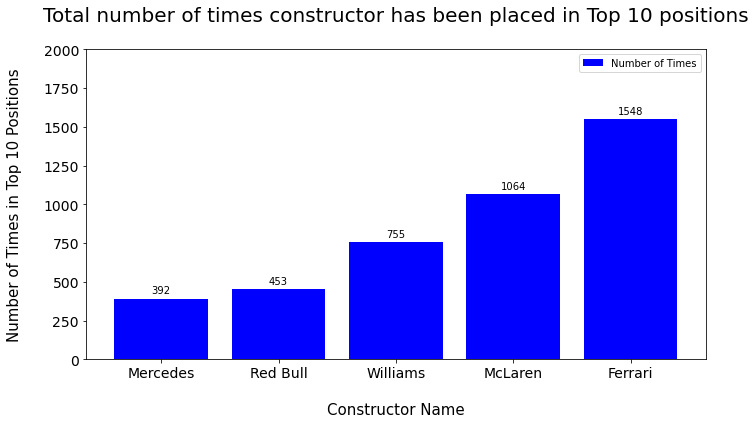

In [28]:
# Define x-axis and y-axis data values
num_of_stays = results_mod_data.groupby('constructorName')['Top 10'].sum().sort_values(ascending=True).tail(5)
neighbourhood_group = num_of_stays.index

# Set the width of the bars
width = 0.8 

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax1 = plt.subplots(figsize=(10,6)) # both "ax" and "axes" are commonly adopted

# Plot bar chart
ax1.bar(neighbourhood_group, num_of_stays, width, label='Number of Times', color = 'b')

# Set title, axis labels, axis range, ticks' size and show legend
ax1.set_title('Total number of times constructor has been placed in Top 10 positions\n', fontsize = 20)
ax1.set_xlabel('\nConstructor Name', fontsize = 15)
ax1.set_ylabel('Number of Times in Top 10 Positions\n', fontsize = 15)
ax1.set_ylim(bottom=0, top=2000)
ax1.tick_params(labelsize=14, axis = 'both')
ax1.legend()

# Display annotations
for x, y in zip(neighbourhood_group, num_of_stays): # zip joins x and y coordinates in pairs

    label = y # value of data label to display

    ax1.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

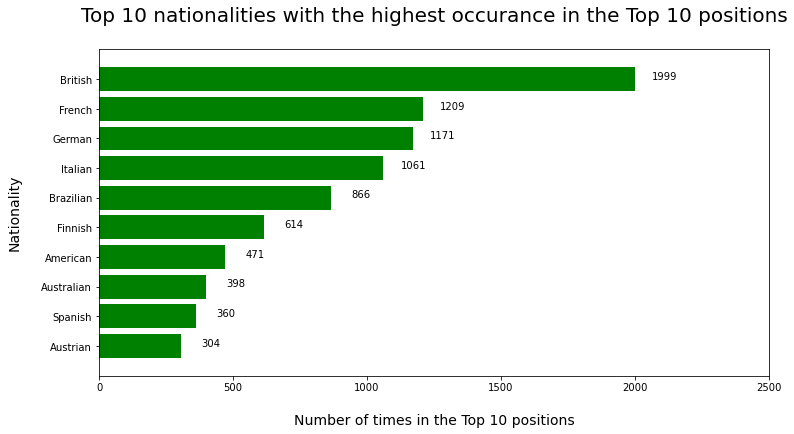

In [29]:
# Define x-axis and y-axis data values
profits = results_mod_data['Top 10'].groupby(results_mod_data['nationality']).sum().sort_values(ascending=True).tail(10)
customer = profits.index

#Set figure size
fig, ax2 = plt.subplots(figsize=(12,6))

# Set the width of the bars
width = 0.8 

ax2.barh(customer, profits, width, label='Number of Stays', color = 'g')

# State title of plot and the axes labels
ax2.set_title('Top 10 nationalities with the highest occurance in the Top 10 positions\n', fontsize = 20)
ax2.set_xlabel('\nNumber of times in the Top 10 positions', fontsize = 14)
ax2.set_ylabel('Nationality\n', fontsize = 14)

# Set ranges for the x-axis and y-axis
ax2.set_ylim(bottom=-1,top=10)
ax2.set_xlim(left=0,right=2500)

# Display data labels
for x,y in zip(customer, profits):

    label = y

    ax2.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(30,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Display the plot 
plt.show()

In [30]:
results_mod_data['driverAge'].unique()

array([23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 21, 20,
       37, 40, 38, 39, 41, 42, 43, 19, 46, 45, 44, 48, 47, 53, 52, 18, 59,
       57, 56, 54, 51, 49, 50, 55])

<function matplotlib.pyplot.show(close=None, block=None)>

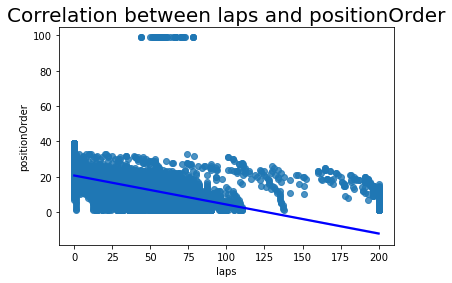

In [31]:
# Plotting scatterplot using seaborn
sns.regplot(x='laps', y='positionOrder', data=results_mod_data, line_kws={"color":"blue"})

# Add the title for the scatterplot
plt.title('Correlation between laps and positionOrder', fontsize=20)

# Display the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

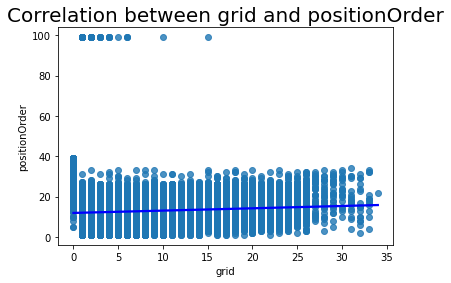

In [32]:
# Plotting scatterplot using seaborn
sns.regplot(x='grid', y='positionOrder', data=results_mod_data, line_kws={"color":"blue"})

# Add the title for the scatterplot
plt.title('Correlation between grid and positionOrder', fontsize=20)

# Display the plot
plt.show

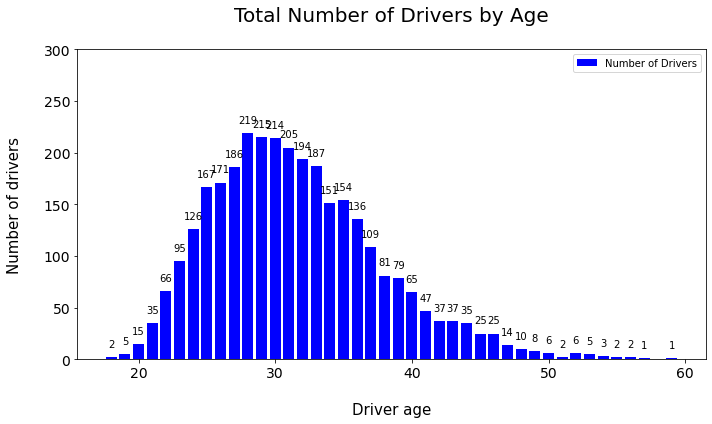

In [33]:
# Define x-axis and y-axis data values
num_of_stays = results_mod_data.groupby('driverAge')['driverId'].nunique().sort_values(ascending=True)
neighbourhood_group = num_of_stays.index

# Set the width of the bars
width = 0.8 

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax1 = plt.subplots(figsize=(10,6)) # both "ax" and "axes" are commonly adopted

# Plot bar chart
ax1.bar(neighbourhood_group, num_of_stays, width, label='Number of Drivers', color = 'b')

# Set title, axis labels, axis range, ticks' size and show legend
ax1.set_title('Total Number of Drivers by Age\n', fontsize = 20)
ax1.set_xlabel('\nDriver age', fontsize = 15)
ax1.set_ylabel('Number of drivers\n', fontsize = 15)
ax1.set_ylim(bottom=0, top=300)
ax1.tick_params(labelsize=14, axis = 'both')
ax1.legend()

# Display annotations
for x, y in zip(neighbourhood_group, num_of_stays): # zip joins x and y coordinates in pairs

    label = y # value of data label to display

    ax1.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

In [34]:
results_mod_data['points'].unique()

array([10.  ,  4.  ,  0.  ,  6.  ,  8.  ,  2.  ,  5.  ,  1.  ,  3.  ,
       15.  , 18.  , 25.  , 12.  , 50.  , 26.  , 16.  , 19.  ,  7.  ,
       27.  ,  7.5 ,  0.5 , 36.  ,  2.5 ,  1.5 , 20.  , 11.  , 13.  ,
        9.  ,  4.5 ,  1.33,  6.5 ,  8.14,  3.5 ,  6.14,  3.14,  8.5 ,
        4.14, 24.  , 30.  , 12.5 ])

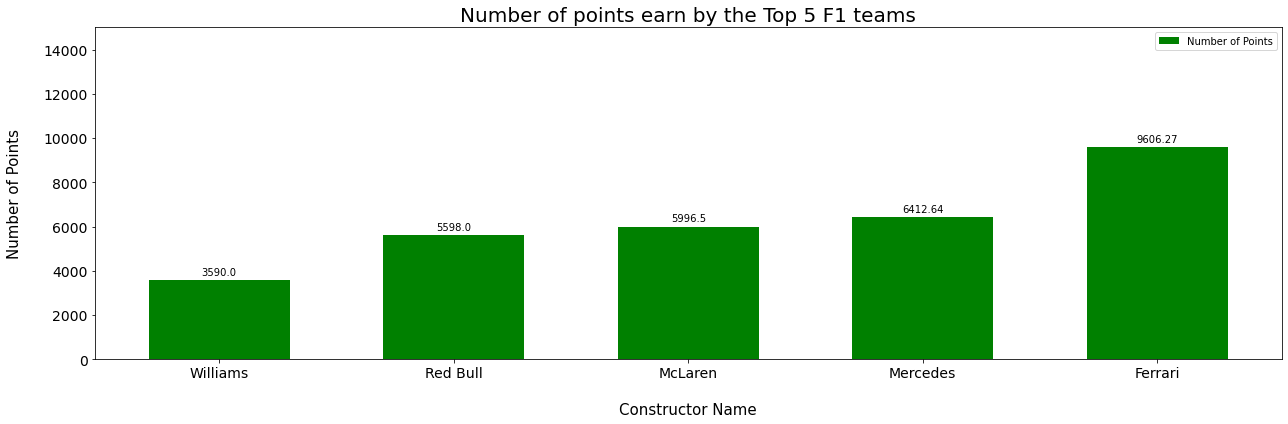

In [35]:
# Define x-axis and y-axis data values
num_of_points = results_mod_data.groupby('constructorName')['points'].sum().sort_values(ascending=True).tail(5)
product_cat_name = num_of_points.index

# Set the width of the bars
width = 0.6

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax = plt.subplots(figsize=(18,6)) # both "ax" and "axes" are commonly adopted

# Plot bar chart
ax.bar(product_cat_name, num_of_points, width, label='Number of Points', color = 'g')

# Set title, axis labels, axis range, ticks' size and show legend
ax.set_title('Number of points earn by the Top 5 F1 teams', fontsize = 20)
ax.set_xlabel('\nConstructor Name', fontsize = 15)
ax.set_ylabel('Number of Points\n', fontsize = 15)
ax.set_ylim(bottom=0, top=15_000)
ax.tick_params(labelsize=14, axis = 'both')
ax.legend()

# Display annotations
for x, y in zip(product_cat_name, num_of_points): # zip joins x and y coordinates in pairs

    label = y # value of data label to display

    ax.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

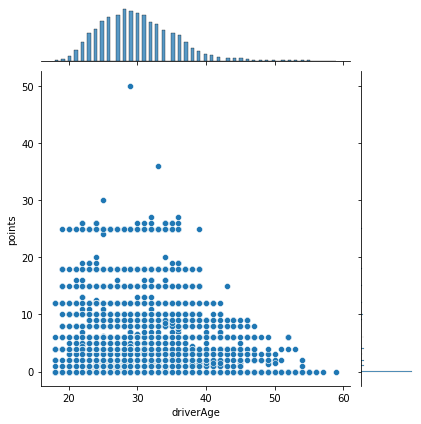

In [36]:
# Joint Distribution Plot
sns.jointplot(x='driverAge', y='points', data=results_mod_data)

# Display the plot
plt.show()

In [37]:
# drop unecessary columns
results_mod_data.drop(['resultId', 'raceId', 'driverId', 'constructorId', 'statusId', 'circuitId', 'driverRef', 
                       'forename', 'surname', 'url', 'dob', 'positionText', 'positionOrder', 'points'], 
                      axis = 1, inplace =True)

In [38]:
results_mod_data['alt'] = results_mod_data['alt'].astype(int)

In [39]:
results_mod_data

,grid,laps,nationality,raceYear,driverAge,alt,circuitName,constructorName,Top 10
0,1,58,British,2008,23,10,Albert Park Grand Prix Circuit,McLaren,1
1,9,56,British,2008,23,18,Sepang International Circuit,McLaren,1
2,3,56,British,2008,23,7,Bahrain International Circuit,McLaren,0
3,5,66,British,2008,23,109,Circuit de Barcelona-Catalunya,McLaren,1
4,3,58,British,2008,23,130,Istanbul Park,McLaren,1
...,...,...,...,...,...,...,...,...,...
25374,18,56,Russian,2021,22,130,Istanbul Park,Haas F1 Team,0
25375,17,54,Russian,2021,22,161,Circuit of the Americas,Haas F1 Team,0
25376,15,68,Russian,2021,22,2227,Autódromo Hermanos Rodríguez,Haas F1 Team,0
25377,19,69,Russian,2021,22,785,Autódromo José Carlos Pace,Haas F1 Team,0


In [40]:
results_mod_data['nationality'].unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Malaysian', 'Argentine',
       'Czech', 'Belgian', 'Swiss', 'Monegasque', 'Swedish', 'Venezuelan',
       'New Zealander', 'Chilean', 'Mexican', 'South African',
       'Liechtensteiner', 'Rhodesian', 'American-Italian', 'Uruguayan',
       'Argentine-Italian', 'Thai', 'East German', 'Russian',
       'Indonesian'], dtype=object)

In [41]:
# create a replacement map for 'nationality' to group East German with German
replace_map = {'nationality':{'East German':'German', 'American-Italian':'American', 'Argentine-Italian':'Argentine'}}
results_mod_data.replace(replace_map, inplace=True)

In [42]:
results_mod_data['nationality'].unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Malaysian', 'Argentine',
       'Czech', 'Belgian', 'Swiss', 'Monegasque', 'Swedish', 'Venezuelan',
       'New Zealander', 'Chilean', 'Mexican', 'South African',
       'Liechtensteiner', 'Rhodesian', 'Uruguayan', 'Thai', 'Russian',
       'Indonesian'], dtype=object)

In [43]:
# train test split
data = results_mod_data

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Top 10', axis=1), data['Top 10'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((17765, 8), (7614, 8))

In [44]:
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [45]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [46]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [47]:
# let's transform train and test set

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


In [48]:
# let's inspect the encoded train set

X_train.head()

,grid,laps,raceYear,driverAge,alt,nationality_British,nationality_Brazilian,nationality_Danish,nationality_Finnish,nationality_Argentine,...,constructorName_Lyncar,constructorName_Bugatti,constructorName_Lotus-Pratt &amp; Whitney,constructorName_Lotus-Maserati,constructorName_Stebro,constructorName_Olson,constructorName_Tec-Mec,constructorName_Snowberger,constructorName_Dunn,constructorName_Wetteroth
20454,16,43,1961,25,162,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19394,8,14,1968,26,578,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3974,7,64,1999,27,109,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7417,11,69,1997,24,37,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13707,2,23,1985,37,37,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_labels = ['Top 10']

In [50]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels}.")

ModeResult(mode=array([0]), count=array([10387]))
The modal class label is 0, and the accompanying string value of this label is ['Top 10'].


In [51]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [52]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [53]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 58.47%.
The Naive Baseline Model's accuracy on test data is 58.18%.


### Step 3: Data Cleansing and Transformation

In [54]:
results_mod_data

,grid,laps,nationality,raceYear,driverAge,alt,circuitName,constructorName,Top 10
0,1,58,British,2008,23,10,Albert Park Grand Prix Circuit,McLaren,1
1,9,56,British,2008,23,18,Sepang International Circuit,McLaren,1
2,3,56,British,2008,23,7,Bahrain International Circuit,McLaren,0
3,5,66,British,2008,23,109,Circuit de Barcelona-Catalunya,McLaren,1
4,3,58,British,2008,23,130,Istanbul Park,McLaren,1
...,...,...,...,...,...,...,...,...,...
25374,18,56,Russian,2021,22,130,Istanbul Park,Haas F1 Team,0
25375,17,54,Russian,2021,22,161,Circuit of the Americas,Haas F1 Team,0
25376,15,68,Russian,2021,22,2227,Autódromo Hermanos Rodríguez,Haas F1 Team,0
25377,19,69,Russian,2021,22,785,Autódromo José Carlos Pace,Haas F1 Team,0


In [55]:
results_mod_data.describe()

,grid,laps,raceYear,driverAge,alt,Top 10
count,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000
mean,11.198550,45.841759,1989.675913,29.983687,278.502975,0.416171
std,7.265065,29.972995,19.038442,5.276018,404.812196,0.492932
min,0.000000,0.000000,1950.000000,18.000000,-7.000000,0.000000
25%,5.000000,21.000000,1976.000000,26.000000,18.000000,0.000000
50%,11.000000,52.000000,1990.000000,29.000000,153.000000,0.000000
75%,17.000000,66.000000,2006.000000,33.000000,401.000000,1.000000
max,34.000000,200.000000,2021.000000,59.000000,2227.000000,1.000000


In [56]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


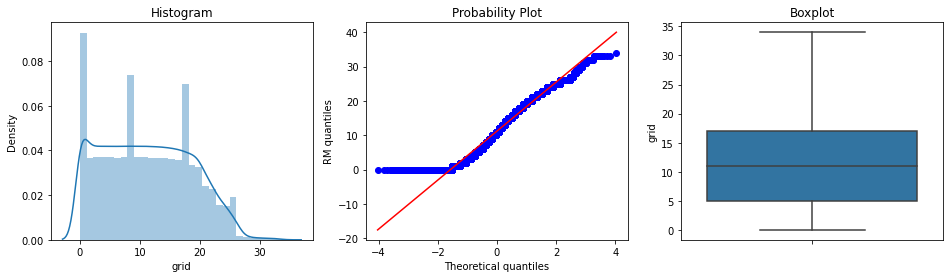

In [57]:
# let's find outliers in grid

diagnostic_plots(results_mod_data, 'grid')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


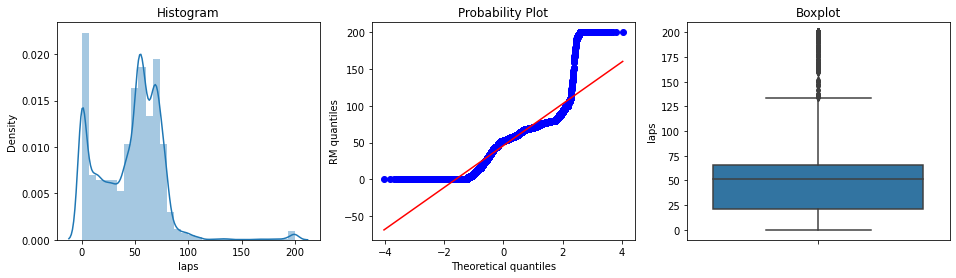

In [58]:
# let's find outliers in laps

diagnostic_plots(results_mod_data, 'laps')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


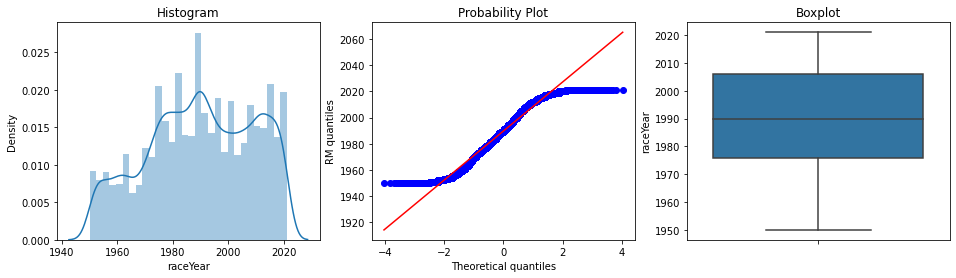

In [59]:
# let's find outliers in raceYear

diagnostic_plots(results_mod_data, 'raceYear')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


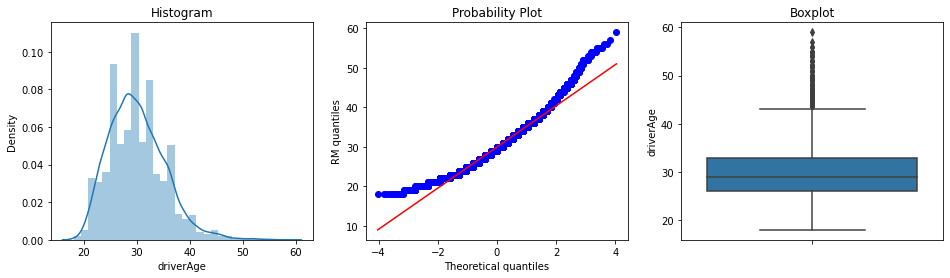

In [60]:
# let's find outliers in driverAge

diagnostic_plots(results_mod_data, 'driverAge')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


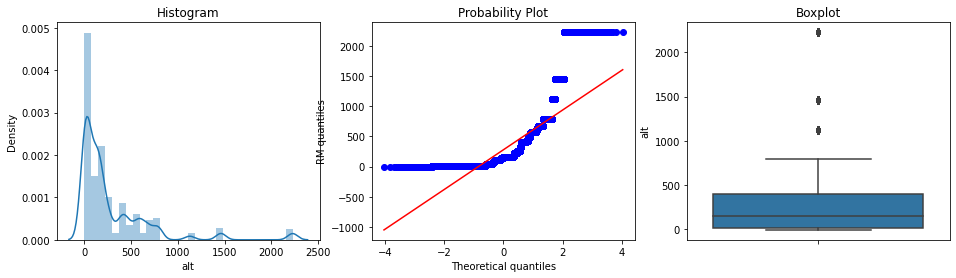

In [61]:
# let's find outliers in alt

diagnostic_plots(results_mod_data, 'alt')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


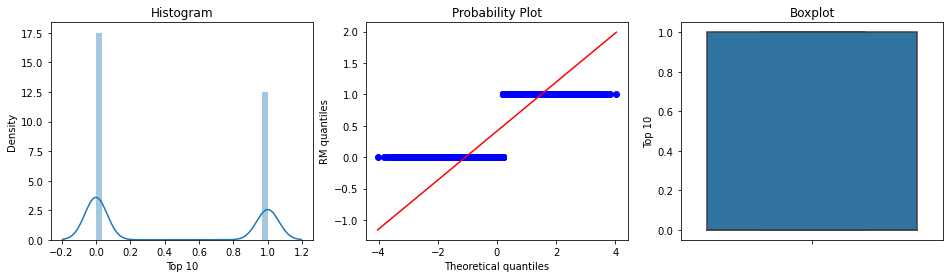

In [62]:
# let's find outliers in Top 5

diagnostic_plots(results_mod_data, 'Top 10')

In [63]:
def detect_outliers(feature):
    outliers = []
    data = results_mod_data[feature]
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    # Identifying outliers at different points
    # If value is out of the 95th percentile of the dataset, assign it to the list of outliers
    # If value is more than 3 standard deviations away from the mean, assign it to the list of outliers
    # If value is out of the 99th percentile of the dataset, assign it to the list of outliers
    
    for y in data:
        z_score = (y - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutliers caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                          len([i for i in data
                                                              if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3 *(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                          len([i for i in data
                                                              if i > data.quantile(.99)])))

In [64]:
# Determine what the upperbound should be for continous features
for feat in ['grid', 'laps', 'raceYear', 'driverAge', 'alt', 'Top 10']:
    detect_outliers(feat)


Outliers caps for grid:
  --95p: 23.0 / 1147 values exceed that
  --3sd: 33.0 / 14 values exceed that
  --99p: 26.0 / 169 values exceed that

Outliers caps for laps:
  --95p: 79.0 / 1254 values exceed that
  --3sd: 135.8 / 240 values exceed that
  --99p: 130.2 / 254 values exceed that

Outliers caps for raceYear:
  --95p: 2018.0 / 1179 values exceed that
  --3sd: 2046.8 / 0 values exceed that
  --99p: 2021.0 / 0 values exceed that

Outliers caps for driverAge:
  --95p: 39.0 / 1112 values exceed that
  --3sd: 45.8 / 223 values exceed that
  --99p: 45.0 / 223 values exceed that

Outliers caps for alt:
  --95p: 1126.0 / 1004 values exceed that
  --3sd: 1492.9 / 498 values exceed that
  --99p: 2227.0 / 0 values exceed that

Outliers caps for Top 10:
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.9 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that


### Trimming - best results

In [65]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [66]:
# limits for laps

laps_upper_limit, laps_lower_limit = find_boundaries(results_mod_data, 'laps', 1.5)
laps_upper_limit, laps_lower_limit

(133.5, -46.5)

In [67]:
# limits for driverAge

driverAge_upper_limit, driverAge_lower_limit = find_boundaries(results_mod_data, 'driverAge', 1.5)
driverAge_upper_limit, driverAge_lower_limit

(43.5, 15.5)

In [68]:
# limits for alt

alt_upper_limit, alt_lower_limit = find_boundaries(results_mod_data, 'alt', 1.5)
alt_upper_limit, alt_lower_limit

(975.5, -556.5)

In [69]:
# let's flag the outliers in the data set

outliers_laps = np.where(results_mod_data['laps'] > laps_upper_limit, True,
                       np.where(results_mod_data['laps'] < laps_lower_limit, True, False))

In [70]:
# let's flag the outliers in the data set

outliers_driverAge = np.where(results_mod_data['driverAge'] > driverAge_upper_limit, True,
                       np.where(results_mod_data['driverAge'] < driverAge_lower_limit, True, False))

In [71]:
# let's flag the outliers in the data set

outliers_alt = np.where(results_mod_data['alt'] > alt_upper_limit, True,
                       np.where(results_mod_data['alt'] < alt_lower_limit, True, False))

In [72]:
# let's trim the dataset of outliers across multiple variables

results_mod_data_trimmed = results_mod_data.loc[~(outliers_laps + outliers_driverAge + outliers_alt), ]

results_mod_data.shape, results_mod_data_trimmed.shape

((25379, 9), (23452, 9))

#### Take a look at the outliers after trimming

<AxesSubplot:ylabel='laps'>

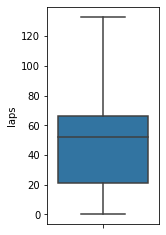

In [73]:
# After trimming
plt.figure(figsize=(2, 4))
sns.boxplot(y=results_mod_data_trimmed['laps'])

<AxesSubplot:ylabel='driverAge'>

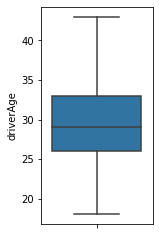

In [74]:
# After trimming
plt.figure(figsize=(2, 4))
sns.boxplot(y=results_mod_data_trimmed['driverAge'])

<AxesSubplot:ylabel='alt'>

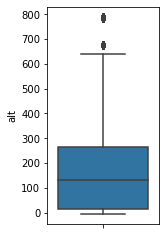

In [75]:
# After trimming
plt.figure(figsize=(2, 4))
sns.boxplot(y=results_mod_data_trimmed['alt'])

## Train test Split

In [76]:
# show shape of "X_train" and "X_test" after split is performed.
X_train, X_test, y_train, y_test = train_test_split(
    results_mod_data.drop('Top 10', axis=1), results_mod_data['Top 10'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((17765, 8), (7614, 8))

In [77]:
X_test.isnull().sum()

grid               0
laps               0
nationality        0
raceYear           0
driverAge          0
alt                0
circuitName        0
constructorName    0
dtype: int64

## Encoding

In [78]:
# find categorical variables 
cat_cols = [c for c in results_mod_data.columns if results_mod_data[c].dtypes =='O']
results_mod_data[cat_cols].head()

,nationality,circuitName,constructorName
0,British,Albert Park Grand Prix Circuit,McLaren
1,British,Sepang International Circuit,McLaren
2,British,Bahrain International Circuit,McLaren
3,British,Circuit de Barcelona-Catalunya,McLaren
4,British,Istanbul Park,McLaren


In [79]:
# Number of unique values for each categorical variables
results_mod_data[cat_cols].nunique()

nationality         38
circuitName         75
constructorName    210
dtype: int64

### One-hot encoding

In [80]:
# make a list of categorical variables to perform encoding with

vars_categorical = ['nationality', 'circuitName', 'constructorName']

In [81]:
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [82]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [83]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [84]:
# let's transform train and test set

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


In [85]:
# let's inspect the encoded train set

X_train

,grid,laps,raceYear,driverAge,alt,nationality_British,nationality_Brazilian,nationality_Danish,nationality_Finnish,nationality_Argentine,...,constructorName_Lyncar,constructorName_Bugatti,constructorName_Lotus-Pratt &amp; Whitney,constructorName_Lotus-Maserati,constructorName_Stebro,constructorName_Olson,constructorName_Tec-Mec,constructorName_Snowberger,constructorName_Dunn,constructorName_Wetteroth
20454,16,43,1961,25,162,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19394,8,14,1968,26,578,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3974,7,64,1999,27,109,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7417,11,69,1997,24,37,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13707,2,23,1985,37,37,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,6,7,1986,31,432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,14,76,1968,34,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,13,0,1988,34,2227,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,12,38,1988,31,153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Min-max scaling

In [86]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([3.300e+01, 2.000e+02, 2.021e+03, 5.900e+01, 2.227e+03, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 

In [88]:
# the scaler stores the minimum values of the features, learned from train set
scaler.min_

array([ 0.00000000e+00,  0.00000000e+00, -2.74647887e+01, -4.39024390e-01,
        3.13339302e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [89]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

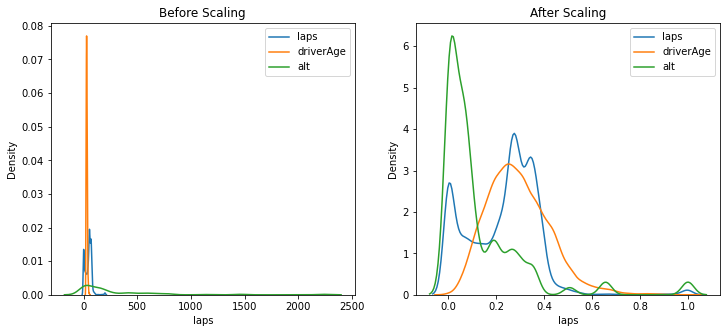

In [90]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['driverAge'], ax=ax1, label ='driverAge')
sns.kdeplot(X_train['alt'], ax=ax1, label ='alt')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['laps'], ax=ax2, label = 'laps')
sns.kdeplot(X_train_scaled['driverAge'], ax=ax2, label ='driverAge')
sns.kdeplot(X_train_scaled['alt'], ax=ax2, label ='alt')
ax2.legend()
plt.show()

### Step 4: Machine Learning Modelling

In [91]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [92]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

In [93]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 83.30%.
The LogReg Model's accuracy on test data is 83.00%.


##### Doing Again but with Scaled Version of X data

In [94]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit(X_train)

X_train_sscaled = sscaler.transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

In [95]:
# logreg_ss = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
logreg_ss = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg_ss.fit(X_train_sscaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [96]:
y_train_preds_logreg_ss = logreg_ss.predict(X_train_sscaled)

# insert code here
y_test_preds_logreg_ss = logreg_ss.predict(X_test_sscaled)

In [97]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg_ss

train_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on train data is {train_accuracy_logreg_ss:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg_ss

test_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on test data is {test_accuracy_logreg_ss:.2f}%.")

The LogRegSS Model's accuracy on train data is 84.93%.
The LogRegSS Model's accuracy on test data is 83.91%.


## Report

### Table of contents

### 2. [Introduction with Value Based Problem Statement](#part1)


### 3. [Problem Formulation](#part2)
   - [3.1) Exploration of the data](#part2.1)
   - [3.2) Formulate a Prediction Problem](#part2.2)

   
### 4. [Data Wrangling on Multiple Tables](#part3)
   - [4.1) Merging drivers with results table](#part3.1)
   - [4.2) Handling NaNs](#part3.2)
       - [4.2.1) Replace '\N' with NaNs](#part3.2.1)
       - [4.2.2) Dropping of columns as they contain high number of null values](#part3.2.2)
   - [4.3) Get race year](#part3.3)
       - [4.3.1) Check if years are in the right format](#part3.3.1)
       - [4.3.2) Replace those with incorrect year format](#part3.3.2)
   - [4.4) Merge races table into main table](#part3.4)
   - [4.5) Getting age of the driver](#part3.5)
   - [4.6) Merge circuits table into main table](#part3.6)
   - [4.7) Merge constructor table into main table](#part3.7)
   - [4.8) Creating a new column named 'Top 10'](#part3.8)


### 5. [Data Cleansing and Transformation](#part4)
   - [5.1) Analyze the data](#part4.1)
   - [5.2) Handling outliers](#part4.2)
   - [5.3) Redundant methods](#part4.3)
   - [5.4) Interesting discovery found](#part4.4)
   - [5.5) Encoding](#part4.5)
   - [5.6) Scaling](#part4.6)
   
   
### 6. [Machine Learning Mode](#part5)
   - [6.1) Count of Rows and Columns in the final dataset](#part5.1)
   - [6.2) Naive baseline model accuracy results](#part5.2)
   - [6.3) Actual model accuracy results](#part5.3)
   - [6.4) Why building of the Naïve Baseline Model is important](#part5.4)
   - [6.5) Summary of what has been done to the model](#part5.5)
   

### 7. [Summary and Further Improvements](#part6)
   - [7.1) Summary](#part6.1)
   - [7.2) Further Improvements](#part6.2)

## 2. Introduction with Value Based Problem Statement

Formula 1 is not just a passion of more than 425 million fans worldwide but also a huge industry employing over 50,000 people in 30 countries. The adage "money makes the world go round" is well known. The situation is the same in Formula One. Unlike Formula One and motorsport, most sports, such as football, rugby, or basketball, are considerably easier to succeed in without having a lot of money.

While other sports could be seen as pay to win, Formula One is instead paid to play or compete in the first place. This indicates that when looking at the balance sheets of Formula One teams, there will be a lot of zeros in it.

As F1 teams invest a lot of money into their cars, it is no doubt that they should also invest in getting the very best drivers in order to get the best return on investment. While having the biggest slice of the pie will certainly help towards getting the best cars on the track, it's also vital to have the very best drivers behind the wheel.

Many of the leading Formula 1 drivers began their trajectory as youngsters and reaching the very top requires a huge investment. Teams invest heavily in the next generation of drivers and it can cost as much as £8m to back a promising young driver, all the way to securing a seat in one of the leading F1 cars.

As such, it's no surprise that F1 drivers are amongst the highest-paid sports professionals around the world. Figures released by GP Fans in 2020 also shows that six-times world champion Lewis Hamilton earns around €48m each year with Mercedes, closely followed by Sebastian Vettel on €42m at Ferrari.

A F1 team typically has 15 to 25 sponsors, each of whom pays a substantial fee to have their brand shown on the car. Because they receive more TV time and are more attractive, only the better-performing teams will usually attract more sponsors while the bottom teams are unlikely to attract many sponsors.

Hence,  knowing if the driver belongs in the top 10 positions is useful as it would allow F1 teams to make a better and wiser decision of whether they should recruit the top-performing drivers into their team so as to increase their chances of winning the championship in order to get a higher return of their investment by attracting more sponsors and higher brand recognition which would increase the amount of sales generated.

## 3. Problem Formulation

### 3.1 Exploration of the data

From this join distrbution plot, we can see that the driver's age affects the number of points they earned. This can be seen from the visualization as the driver who is around 30 years of age obtained the highest points of around 50. Hence, this shows that the age of the driver does indeed affect their chances of winning as drivers above 40 years of age have the lowest amount of points earned, which means the least chances of winning the season.

#### Correlation between driver's age and points
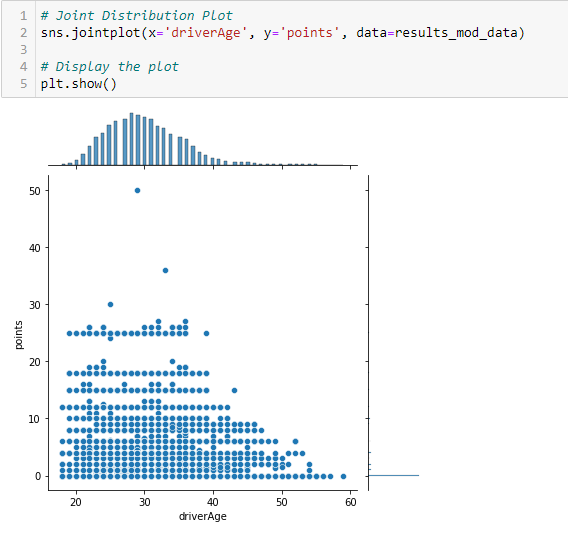

This bar chart shows the total number of F1 drivers by age. From this bar chart, we can see that most of the F1 drivers are aged between 26 to 34. 

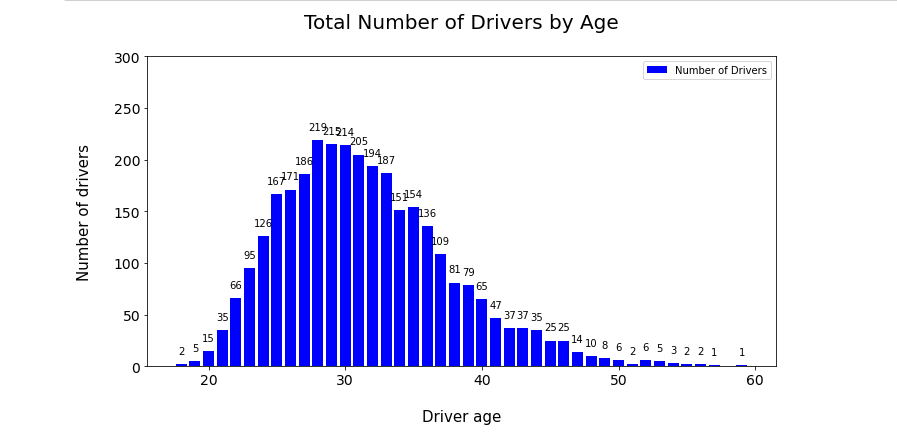

This bar chart shows the total number of points earned by the Top 5 F1 teams. From this bar chart, we can see that the Top 5 F1 teams by points are Ferrari, Mercedes, McLaren, Red Bull as well as Williams respectively. Amongst these 5 teams, Ferrari is ranked highest with the most number of points obtained at 9606.27.

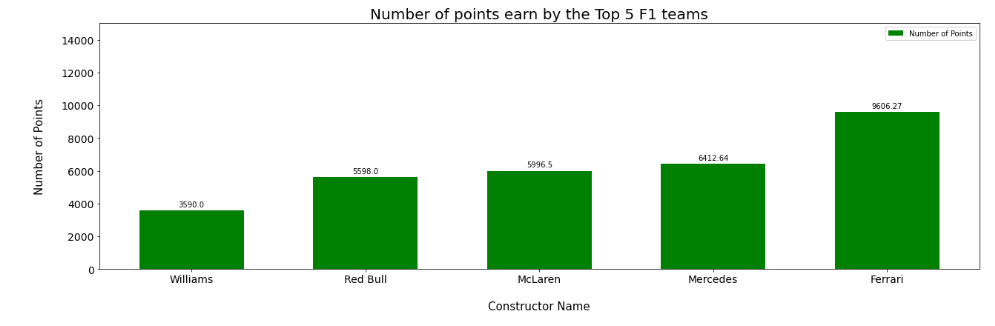

This scatterplot shows the correlation between laps and positionOrder. From this scatter plot, we can see that laps and positionOrder are negatively correlated. This is because as the number of laps increases, the positionOrder decreases. This can be seen from the scatterplot at the number of laps increases from 0 to 200, the positionOrder decreases from 20 to around 5.

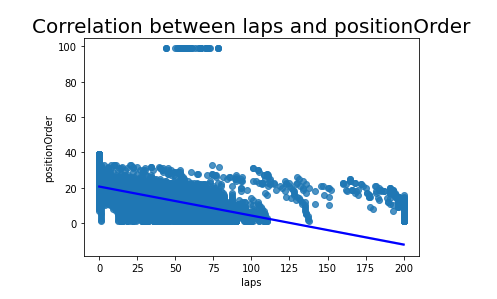

This scatterplot shows the correlation between grid and positionOrder. From this scatter plot, we can see that grid and positionOrder are positively correlated. This is because as the grid number increases, the positionOrder also increases. This can be seen from the scatterplot at the grid number increases from 0 to 35, the positionOrder increases slightly from around 15 to slightly below 20.

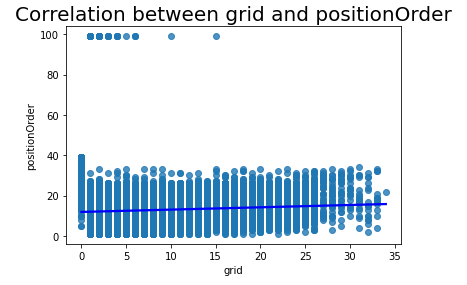

This bar chart shows the number of times the top 5 constructors has been placed in the Top 10 positions. From this bar chart, we can see that the Top 5 F1 teams by the total number of times they have been placed in the Top 10 positions are Ferrari, Mercedes, McLaren, Red Bull as well as Williams respectively. Amongst these 5 teams, Ferrari is ranked highest with the most number of times placed in the Top 10 positions at 1548 times.

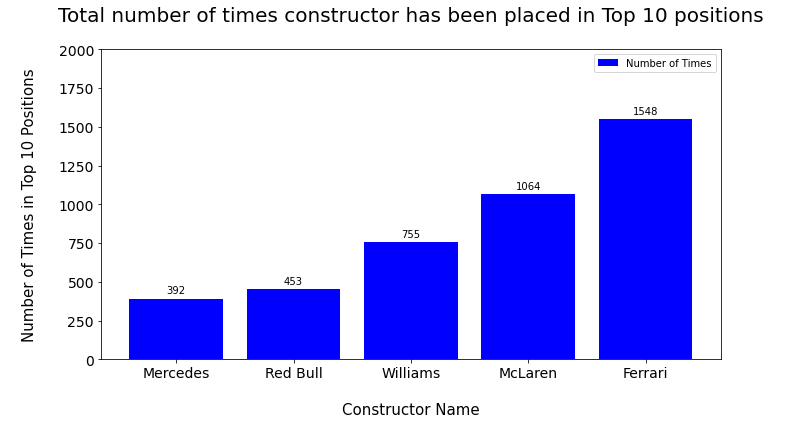

This bar chart shows the top 10 nationalities of the F1 drivers who have been placed in the Top 10 positions the most amount of times. From this bar chart, we can see that F1 drivers who are British has been in the Top 10 positions the highest amount of times at 1999 times. This can be due to a multitude of factors such as there are the highest number of British drivers or most British drivers are aged betwwen 26 to 30 which explains why they are often placed amongst the Top 10 positions.

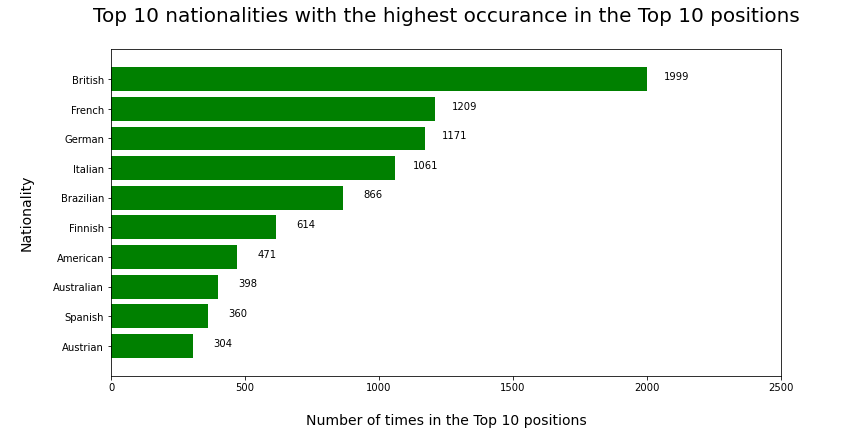

### 3.2 Formulate a Prediction Problem

The prediction problem I came up with is: Does the F1 driver belongs in the top 10 positions?

This is to allow the various F1 teams to keep note of uprising and new talents so that they will be able to recruit the top and highest performing drivers into their team so as to increase their chances of winning the championship.

## 4. Data Wrangling on Multiple Tables

### 4.1 Merging drivers with results table
The main table which was used in this assignment is the results table as it contains many foreign keys for merging to other tables. Firstly, in order to obtain the columns which are found in the drivers table, I had to make use of inner join to merge my main table, the results table, with the drivers table. Inner join combines records from both the results and drivers table whenever there are matching values in a field common to both of these tables. By using inner join, I am able to obtain a combination of all the columns from both the drivers and results table. A drop_duplicates() function is also used in order to remove repeated columns obtained as a result of this merge.

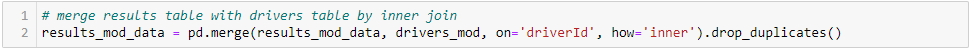

### 4.2 Handling NaNs

### 4.2.1 Replace '\\N' with NaNs 
Next, I replace '\\N' with NaNs in order to take a look at how many null values are there in each column. 

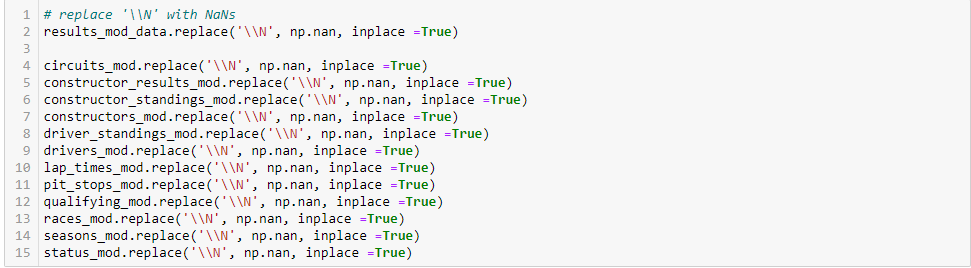

In order to take a look at the number of NaNs in each column, I had to make use of isnull().sum() to see how many NaNs are there in each column obtained from the merging of the results and drivers table.

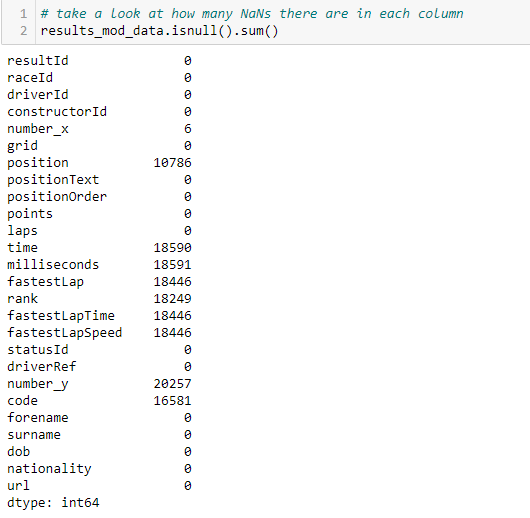

### 4.2.2 Dropping of columns as they contain high number of null values
Then, I decided to drop the columns with NaNs as they are not necessary and there are also too many null values in these columns to deal with

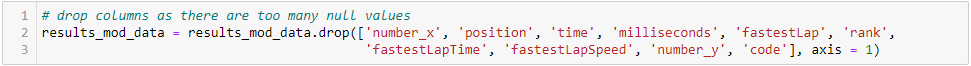

### 4.3 Get year of the race
In order to obtain the year of the race, I had to make use of the url which is found in the races table. As the first part of the url is redundant, I had decided to replace the first part of the url with an empty string. This replacement was done twice as some url starts with http while others starts with https. Hence, in order to ensure all the url will be successfully replaced, two replacements have to be done. 

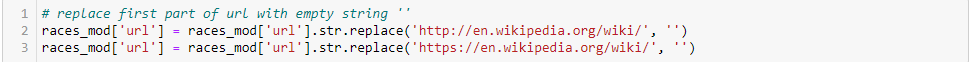

After the replacement is done, only the last part of the url will be obtained. In order to get the year from the url, we have to split the string by the underscore, then get the first part of the string which is the year of the race alone. Once the year of the race have been obtained, the column is then renamed from url to raceYear. 

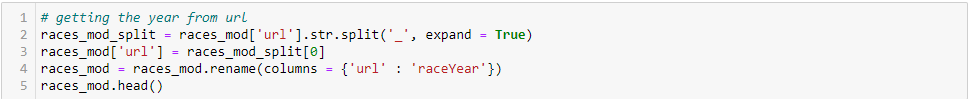

### 4.3.1 Check if years are in the right format
In order to check whether the year of the races are in the correct format, races_mod['raceYear'].unique() is performed. From this, we can see that 70th and São are in the wrong format. Hence, in order of replace these rows with the correct year format, we have to get the year of the race from the date column and replace 70th and São respectively with the correct year format.

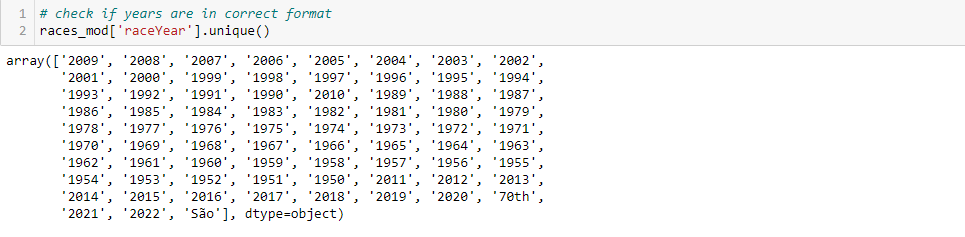

### 4.3.2 Replace those with incorrect year format
Firstly, we have to check the row number where the years are represented in the wrong format which is 70th and São respectively. In order to do so, we can print the index of the rows where the raceYear is 70th and São respectively. Then, with the index of the rows, we can check what the years are in these two columns from the date column and replace these values with their respective years from the date column.

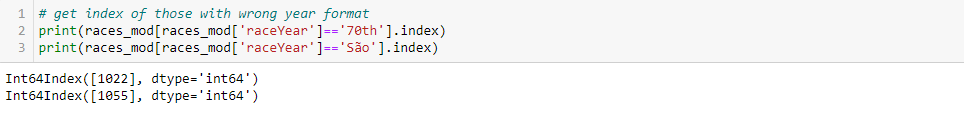

From the date column, we can see that 70th and São represents the year 2020 and 2021 respectively. Hence,  a replacement was done to replace 70th and São with 2020 and 2021 respectively so that all the raceYear are now in the correct year format.

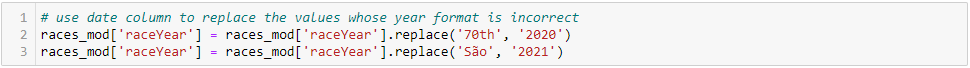

### 4.4 Merge races table into main table
In order to add the raceYear column which we had just created and the column circuitId into the main table, a left join is used to merge the races table into the main table by using the raceId. Left join returns all rows from the left table and the matching rows from the right table. This mean that by using left join, I will be able to obtain a combination of all the columns from my main table as well as an additonal two columns which are the raceYear and circuitId respectively. A drop_duplicates() function is also used in order to remove the duplicated column, in this case raceId, obtained as a result of this merge.

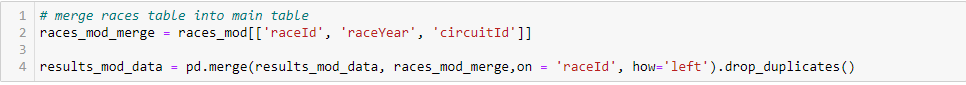

### 4.5 Getting age of the driver
In order to get the age of the driver at the time of the race, we have to first split the date of birth (dob) by the underscore and get the first string obstained from the splitting which is the year from the dob column. Then, a new column called driverAge is created. This column is calculated by subtracting the year of the race with the year from the dob column in order to get the driver's age at the time of the race itself.

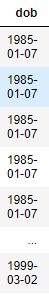

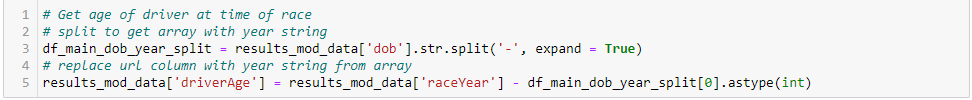

### 4.6 Merge circuits table into main table
In order to obtain the altitude as well as the circuit name, I had to make use of left join to merge the circuit table into my main table, results_mod_data, which is a combination of the results and drivers table as of now. Left join returns all rows from the left table and the matching rows from the right table. This mean that by using left join, I will be able to obtain a combination of all the columns from my main table as well as an additonal two columns which are the alt and name respectively. A drop_duplicates() function is also used in order to remove the repeated columns, in this case circuitId, obtained as a result of this merge.

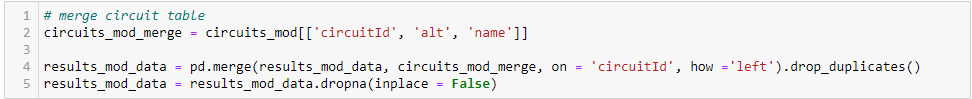

Next, in order to avoid confusing as there are more than 1 columns called name in the tables that I will be using for the merge, I will rename the name column from the circuit table to circuitName

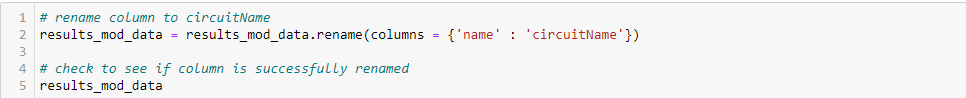

### 4.7 Merge constructor table into main table
As the constructor name plays a part in determining the top 10 positions of the driver, I will be making use of the constructor name. In order to get the constructor name, I had to make use of left join to merge the constructor table into my main table, results_mod_data. Left join returns all rows from the left table and the matching rows from the right table. This mean that by using left join, I will be able to obtain a combination of all the columns from my main table as well as an additonal column which is the circuit name. A drop_duplicates() function is also used in order to remove the repeated columns, in this case constructorId, obtained as a result of this merge.

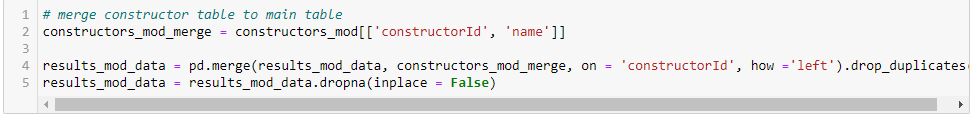

Next, I will be renaming the name column obtained from the constructor table as a result of the merge to constructorName

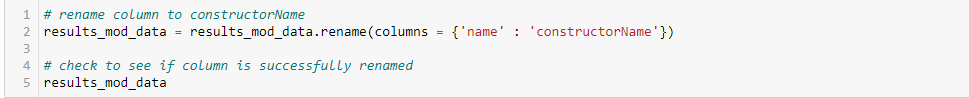

### 4.8 Creating a new column named 'Top 10'
In order to determine whether the driver belongs in the top 10 positions, the positionOrder column is made use of. A new column Top 10 is created which determines if the driver belongs in the top 10 positions or not. This is determined by using the positionOrder and if the positionOrder is less than or equals to 10, the driver would be in the top 10 positions, and is represented by a value of 1 in the new created Top 10 column.

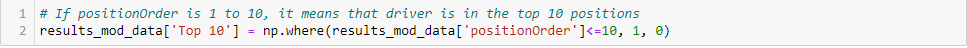

## 5. Data Cleansing and Transformation

### 5.1 Analyze the data
Pandas DataFrame describe() method is used to calculate some statistical data such as percentile, mean and std of different numerical values of the DataFrame. It is used to analyze both numeric as well as the object series and also the DataFrame, which has column sets of mixed data types. Pandas DataFrame describe() method is used to give all the essential information about the Dataset, which can be further utilized for analyzation of data and to derive different mathematical assumptions for further study. By using describe(), I am able to determine what are the maximum values of each columns and whether are they far away from the 99th percentile of their respective values in order to allow me to make an inform decision when handling outliers by performing methods such as capping an trimming.

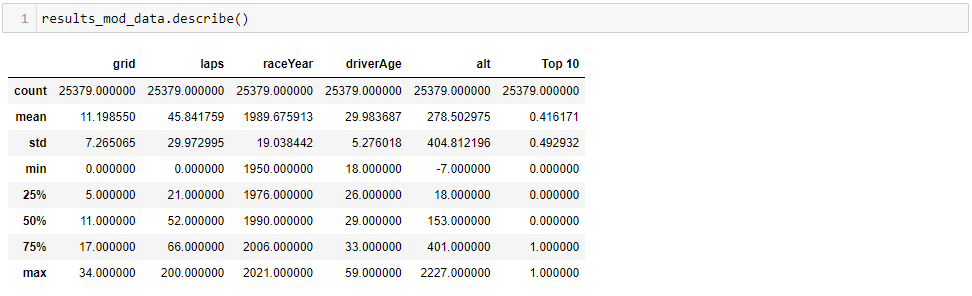

### 5.2 Handling outliers

First and foremost, I had started off by creating a function to plot a histogram, Q-Q plot and boxplot in order to identify all the outliers for the numerical variables. From the plots created, we can see that outliers were found in three of the variables which are 'laps', 'driverAge' and 'alt' respectively. 

Out of the three methods to deal with the outliers namely, trimming, capping as well as winsorization, I have decided to go with trimming as it gives the best results. This can be seen from the results shown below as trimming gives a higher accuracy on both the train and test data as compared to capping and winsorization

### Trimming results: 
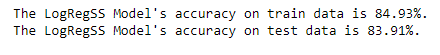

### Capping results: 
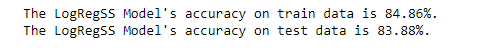

### Winsorization results: 
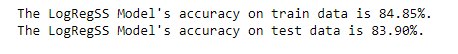

Firstly, I started by performing winsorization at the 99th percentile for laps; driverAge and alt, which is the practice of altering data by reducing the extreme values, also known as outliers, to a given arbitrary value which is closer to the distribution's mean. Winsorizing differs from trimming in that the extreme values are not deleted, but rather replaced with new ones. Setting outliers to a specific percentile is a common method. With 99 percent winsorization, for example, we set all data below the 1st percentile to the 1st percentile value and all data above the 99th percentile to the 99th percentile value. Because winsorization is symmetric, the winsorized mean of a symmetric distribution represents an unbiased representation of the variable's distribution. However, performing this method results in a lower accuracy as compared to trimming and capping which can be seen from the resullts shown above. This is because from the boxplot shown below, we can see that outliers for all the three variables are mainly only found on the upper bounds of their dataset. Hence, in this case, Winsorization would not be necessary as capping would only need to be done on the upper limits of this distribution.


Next, I decided to perform capping for all the three variables, namely, laps; driverAge and alt. Similarly to winsorization, capping is done by replacing the extreme values by values closer to other values in the variable, by determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile range proximity rule. This procedure, which is also known as bottom and top coding, censoring, or capping, is done by capping both extremes of the distribution or just one of the tails, depending on where we find the outliers in the variable. As outliers are only found at the upper bounds of the distribution, capping at its 99th quantile was done for all three variables. However, after this is done, we can still observe that there are a large number of outliers in alt. Hence, I decided to cap alt at its 95th quantile while the other two variables remain capped at their 99th quantile. From the distribution of the boxplot for alt below, we can clearly see that the number of outliers in alt greatly decreases once it was capped at its 95th quantile instead of its 99th quantile. However, the results obtained for capping was not the best.

Hence, I decided to perform trimming in hopes of it having a higher accuracy than capping and winsorization. Trimming is the process of removing observations that show outliers in one or more variables in the dataset. When performing trimming, there are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. The first method is if the variable is normally distributed, the boundaries are given by the mean plus or minus three times the standard deviation, as approximately 99% of the data will be distributed between those limits. The second method is done by  determining the limits using the inter-quartile range proximity rules for normally, as well as not normally distributed variables. Lastly, it is done by directly setting the limits to the 5th and 95th quantiles. When trimming is done, it gives the model the best accuracy. Hence, I decided to stick with trimming when dealing with outliers in this dataset.

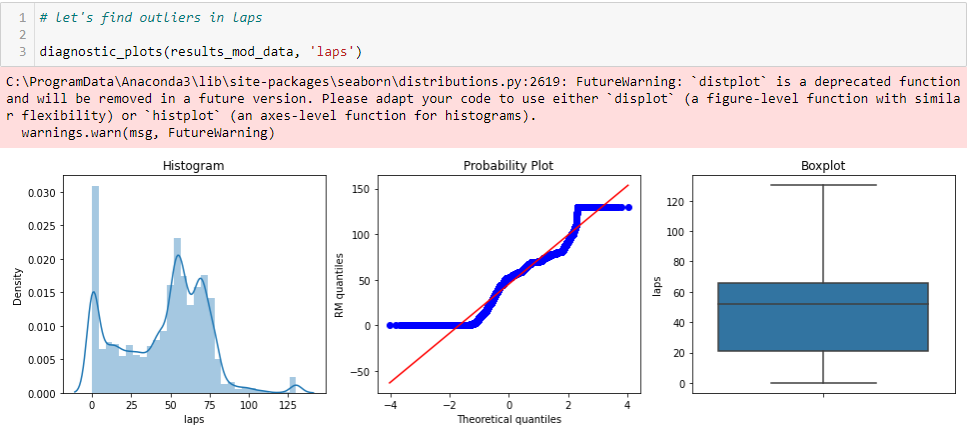

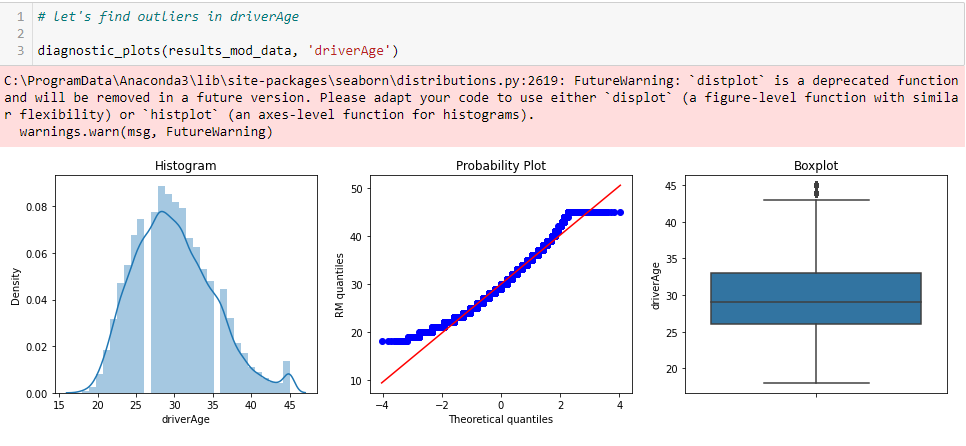

#### Alt - Capped at its 99th quantile:
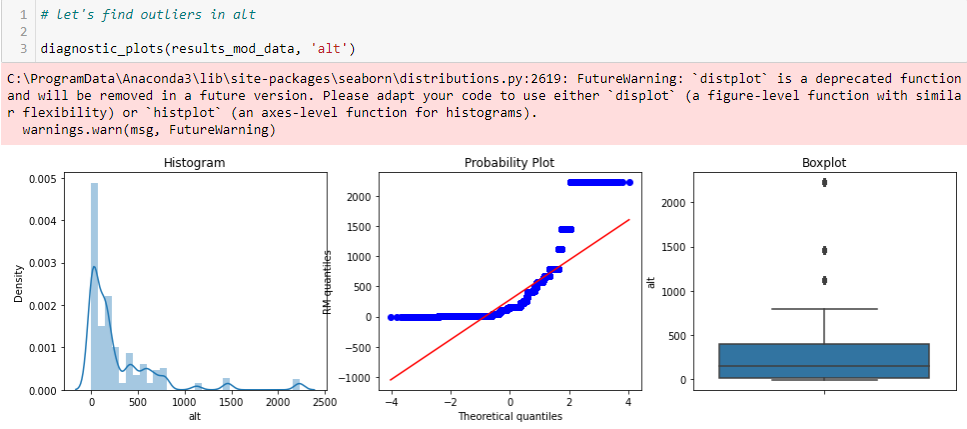

#### Alt - Capped at its 95th quantile:
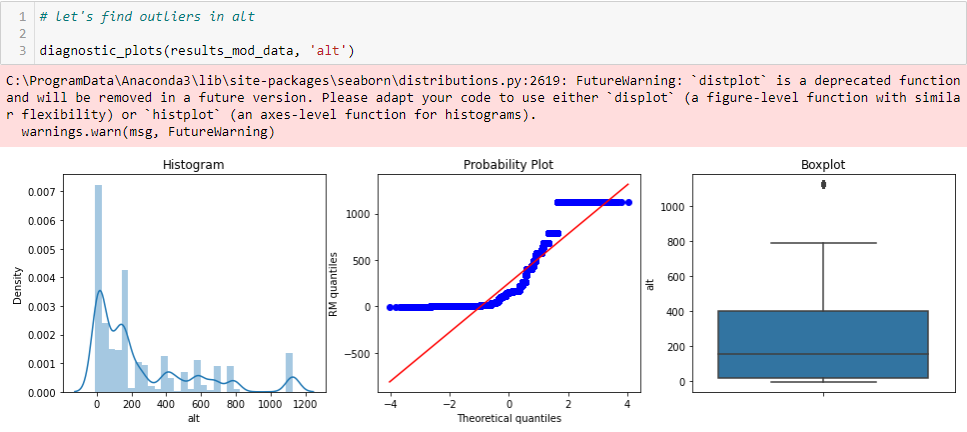

### 5.3 Redundant methods 

Variable discretization, also known as binning, is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variable/model/function. After trying out several discretization techniques such as equal width and equal frequency discretization, I decided to not perform discretization as it did not help improve my model's accuracy, hence, this step was skipped as it was redundant.

Similar to discretization, transformation of numerical variables also did not help to improve my model's accuracy, and hence, was skipped as it was redundant in this case

Results were the same whether discretization and transformation was performed:
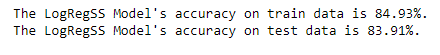

### 5.4 Interesting discovery found
An interesting discovery can be found in nationality. Upon further research, I found out that people with the nationality of American-Italian are actually Americans while those with a nationality of Argentine-Italian are from Argentine. Hence, I decided to do a replacement map to group these groups of people (American-Italian to Italian and Argentine-Italian to Argentine). Furthermore, those with a nationality of East German are actually subgroups of German, hence, I decided to group them to German nationality using the replacement map shown below.

#### Interesting discover found:
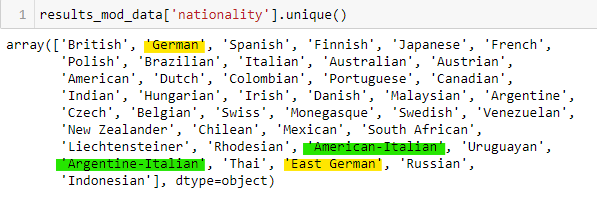

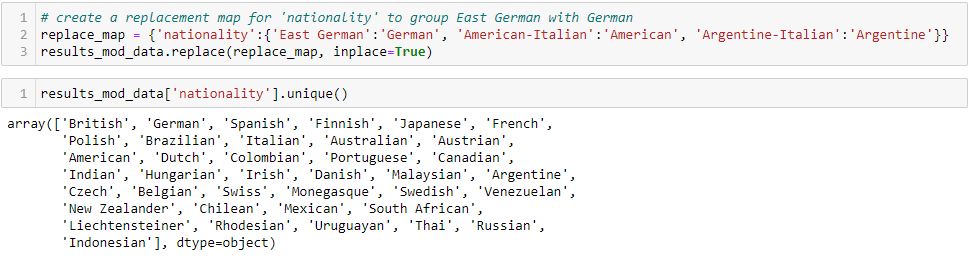

### 5.5 Encoding

Firstly, I had decided to perform ordinal encoding on the categorical variables, 'nationality', 'circuitName' as well as 'constructorName'. Ordinal encoding is done by replacing the categories with digits from 1 to k (or 0 to k-1, depending on the implementation), where k is the number of distinct categories of the variable and the numbers are assigned arbitrarily.

However, when performing ordinal encoding, the accuracy of my model deproves by a lot, hence, ordinal encoding will be not the most efficient to use in this case.

#### Ordinal encoding results:
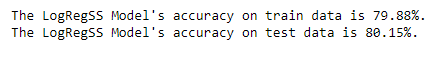

Next, I had tried out count/frequency encoding. In count or frequency encoding, we replace the categories with the count or the percentage of observations with that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding, or by 0.1 if performing frequency encoding.

However, this method of encoding cannot be used in this case as there are a high number of unique values for all the categorical variables. Hence, if count or frequency encoding is being performed, it would cause overfitting of the data as some observations will have the same values which is not what we want to achieve.

Thirdly, I had decided to perform target mean encoding. Target encoding, also known as mean encoding,  implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target. 

Similar to count or frequency encoding, this method of encoding cannot be used due to the high number of unique values existing in the categorical variables. Hence, if target mean encoding is being performed, it would cause overfitting of the data as some observations will have the same values which is not what we want to achieve.

Lastly, I had decided to perform one-hot encoding. In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0). 

By performing one-hot encoding, the accuracy of my model is at its highest, hence, suggesting that this method of encoding works best for my model thus, I made the choice of performing one-hot encoding as it gives the best results of the model.

### 5.6 Scaling

For scaling, I had decided to make use of min-max scaling as it gives me the best performance of my model. 
Before arriving at my final decision of making use of min-max scaling, I have tried out all the other methods of scaling and realise that standard and min-max scaling gives me the same results. 

Standard scaling is done by standardization which is the process of centering the variable at zero and standardizing the variance to 1. In order to standardize features, we first subtract the mean from each observation and then divide the result by the standard deviation. The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean.

Min-max scaling, on the other hand, is done by scaling to the minimum and maximum values which squeezes the values of the variables between 0 and 1. To implement this scaling technique, we have to subtract the minimum value from all the observations and divide the following result with the value range, that is, the difference between the maximum and minimum values. 

Since both standard and min-max scaling gives the same output, I had decided to go with min-max scaling as I feel that it is more suitable for use in this case as it squeezes the data closer to zero.

## 6. Machine Learning Model

### 6.1.  Count of Rows and Columns in the final dataset
For my final dataset, I have a total of 25379 rows and 9 columns. This is obtain after merging all the necessary tables with one another and dropping of the redundant columns

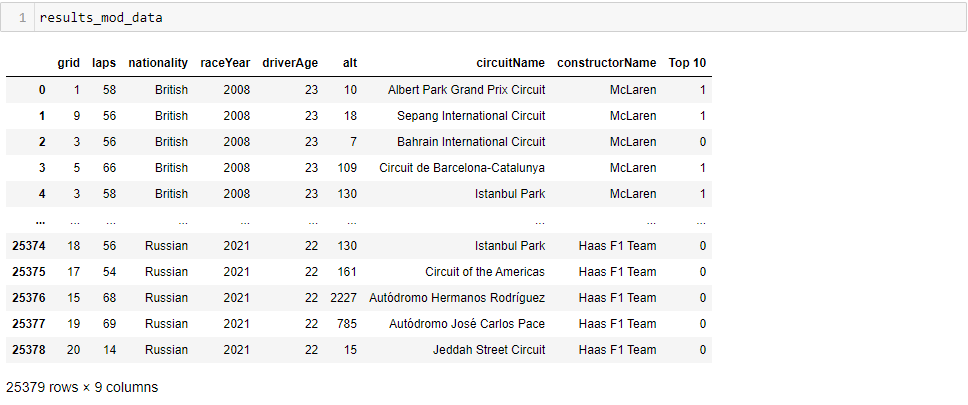

### 6.2 Naive baseline model accuracy results
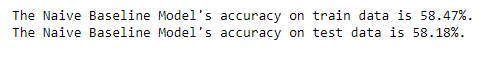

### 6.3 Actual model accuracy results
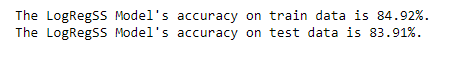

### 6.4 Why building of the Naïve Baseline Model is important

From the results shown above, we can clearly see that the actual model accuracy results is actually much higher as compared to the naïve baseline model as the naïve baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models. Baseline models usually lack complexity and may have little predictive power, hence, accounting for the low accuracy obtain from the naïve baseline model.

However, it is important to build a naïve baseline model before the actual model as it does not only serves as a benchmark for the trained model, it also improves our understanding of the data. This is because in order to properly assess a model regardless of the scenario, a benchmark is required to adequately evaluate a model. Hence, a baseline model is used to evaluate the trained model more effectively by using it as a benchmark. If a model improves upon the shortcomings of the baseline and exhibits better overall performance, you can support it. However, if the trained model does not outperform the baseline model, then the extra complexity of the model is not sufficiently advantageous.

Besides that, baseline models can also indicate if your data is sufficient or adequate enough for the machine learning task in question. For instance, if a classification model fails to predict certain classes, efforts should be placed on addressing this flaw. This could mean fine-tuning a model to better predict those classes or it could mean revisiting the data representing those classes. Additionally, it may indicate that the data set lacks predictive power if your trained models cannot outperform the baseline model. So rather than continuing to train models, it would be a wise decision in this situation to check the accuracy of the data.

### 6.5 Summary of what has been done to the model

Firstly, I had loaded my data into this file using the pd.read_csv method. After which, I had replace all the '\\N' with NaNs in order to identify all the null values and drop the columns which have null values as they are not needed to be used in the final data model, especially so due to the high number of NaNs located in these columns.

Secondly, I made an interesting discovery that some sort of duplicated values exists in nationality. This includes American-Italian, Argentine-Italian, as well as East German. Hence, I decided to do a replacement map to group people of the nationality (American-Italian to Italian and Argentine-Italian to Argentine). Furthermore, those with a nationality of East German are actually subgroups of German, hence, I decided to group them to German nationality using the replacement map shown below.

Next, in order to identfy the outliers, I had created a function to create histogram, Q-Q plot and boxplot to find the outliers using the visualisations. For example, we can see that 'laps', 'driverAge' as well as 'alt' contains outliers at their upper boundaries which is represented  by the dots found on the top of the box plot. Besides that, I had also created a function to detect outliers mainly at the 95th percentile, 99th percentile and 3 standard deviations away from its mean respectively. Initially, I had decided to use capping and cap the columns 'laps', 'driverAge' to their 99th percentile while 'alt' to its 95th percentile in order to reduce the number of outliers. However, capping did not perform as well as trimming. Hence, trimming was used to reuduce the number of outliers in these three columns and it also ensures the highest accuracy of the model.

Then, I performed train test split for the data into 70% training and 30% testing data.

After train-test split, I did categorical data encoding. The method I chose is one-hot encoding as it gives the best results as compared to other methods such as ordinal encoding with pandas.

Lastly, for scaling, I had decided to make use of MinMaxScaling. Upon trying out various scaling methods, I found out standard scaler as well as min-max scaler gives the same accuracy of the model. However, I had decided to go with min-max scaling as it is my prefered way of performing scaling.

## 7. Summary and Further Improvements

### 7.1 Summary

In conclusion, I found out that binning as well as transformation did not improve my model performance therefore, I did not made use of these steps in this assignment. Initially, as my prediction problem was to simply find out if the F1 driver wins the race, the accuracy of my Naïve Baseline Model was really high. This is because since there can only be 1 winner amongst so many drivers, it is predicting with high accuracy that the driver will have a target value of 0, thus, accounting for the high accuracy of the Naïve Baseline Model. Hence, I decided to chnage my prediction problem to find out whether the driver belongs in the Top 10 positions. By doing so, I obtained a much lower accuracy for my Naïve Baseline 
Model which is what I wanted to achieve. Besides that, I had also initially left in the columns, 'positionText', 'positionOrder', as well as 'points', which lead to a high accuracy of the Naïve Baseline Model being obtained. This is because these 3 columns are closely related to what I am predicting, which is whether the driver belongs in the Top 10 positions. Hence, these 3 columns are dropped so that it would not affect the accuracy results obtained.

### 7.2 Further Improvements

One further improvement which I could do is trying a different random seed for my train test split. This is because upon doing scaling, I realise Min-Max scaling as well as standard scaling gives me the same results. Hence, a different random seed could be used during train test split which will hopefully change the results when using ddifferent methods of scaling.

Another further improvement which I could take into account to improve my code is the efficiency of my code. This is because the detect_outliers function which I had created to detect outliers for the numerical variables at their 95th percentile, 99th percentile and 3 standard deviations away from its mean takes too long to run hence, I could try breaking the code down into smaller portions so that the code coud take less computation time to run which will improve the efficiency of the code overall.